In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import statsmodels.api as sm1
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import folium

df_DataSet = pd.read_excel('https://github.com/eliasruizbone/Coder-DS/raw/main/DataSet/SuperTiendas/Supertiendas-RuizboneElias.xlsx', engine='openpyxl')

In [56]:
HTML('''
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
<script>
    code_shown = true;
    function code_toggle() {
        if (code_shown) {
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_shown = !code_shown;
    }
</script>
''')


In [57]:
HTML("""
<h1 style="text-align: center; color: #0073e6">Análisis Exploratorio de Datos</h1>
""")


In [58]:
HTML("""
<h1 style="text-align: center; color: #0073e6">Estructurando un Proyecto de DS (parte II)</h1>
""")

# Análisis de Rentabilidad en el Conjunto de Datos "Superstore"

En esta segunda parte de mi proyecto de Análisis Exploratorio de Datos (EDA), me centraré en el conjunto de datos "Superstore" con un enfoque en la variable objetivo: la ganancia. El objetivo principal es optimizar la rentabilidad de nuestro negocio.

## Pasos para Alcanzar el Objetivo:

### 1. Exploración de las Ganancias

- Exploraré las ganancias desglosadas por productos, categorías de productos, segmentos de clientes, ubicaciones geográficas y otros atributos relevantes en el conjunto de datos.

### 2. Identificación de Productos Rentables

- Identificaré los productos o categorías que generan las ganancias más altas y evaluaré si existen productos menos rentables.

### 3. Análisis del Margen de Ganancias

- Analizaré el margen de ganancias de cada producto o categoría para determinar su contribución a la rentabilidad general.

### 4. Impacto de los Descuentos

- Analizaré cómo las estrategias de precios y descuentos han afectado las ganancias. ¿Los descuentos han aumentado o disminuido las ganancias?

### 5. Segmentación de Clientes

- Clasificaré a los clientes en grupos en función de sus compras y su contribución a las ganancias.

Estos pasos me permitirán realizar un análisis completo de las ganancias en el conjunto de datos "Superstore" y tomar decisiones informadas para optimizar la rentabilidad de nuestro negocio.

**Contexto Empresarial:**

Nos ubicamos en el mundo del comercio minorista en una cadena de tiendas llamada "Superstore." Esta cadena tiene presencia en diversas ubicaciones a nivel nacional y se dedica a la venta de una amplia gama de productos, desde dispositivos electrónicos hasta artículos para el hogar y suministros de oficina. La empresa "Superstore" busca mejorar su rentabilidad y eficiencia operativa mediante un análisis de datos exhaustivo.

**Problema Empresarial:**

El desafío que enfrenta "Superstore" es optimizar sus ganancias en un mercado altamente competitivo. La empresa busca identificar oportunidades para aumentar su rentabilidad al comprender mejor las dinámicas de ventas, los márgenes de ganancias, los costos operativos y el comportamiento de sus clientes. Además, se busca identificar productos o categorías que contribuyen significativamente a las ganancias y áreas donde se pueden reducir costos sin afectar la calidad. "Superstore" también busca retener a sus clientes más valiosos y anticipar oportunidades de crecimiento a lo largo del tiempo.

**Contexto Analítico:**

Para abordar esta problemática, se aplicará un enfoque analítico basado en datos. Se utilizarán técnicas de análisis de datos y modelado predictivo para explorar el conjunto de datos de ventas de "Superstore". El análisis se enfocará en obtener insights sobre las ganancias y cómo se ven afectadas por diversos factores, como productos, categorías, precios, costos y comportamiento del cliente. Se aplicarán herramientas de visualización y estadísticas descriptivas para identificar patrones y tendencias en los datos. Además, se utilizarán análisis de series temporales para comprender las variaciones estacionales. El objetivo es proporcionar recomendaciones basadas en datos que permitan a "Superstore" tomar decisiones informadas para optimizar su rentabilidad.

In [59]:
df_DataSet.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [60]:
df_DataSet.shape

(9994, 21)

In [61]:
# Cambiando los nombres de las columnas
nuevos_nombres = {
    'Row ID': 'ID',
    'Order ID': 'ID_Pedido',
    'Order Date': 'Fecha_Pedido',
    'Ship Date': 'Fecha_Envio',
    'Ship Mode': 'Modo_Envio',
    'Customer ID': 'ID_Cliente',
    'Customer Name': 'Nombre_C',
    'Segment': 'Segmento_C',
    'Country': 'Pais_C',
    'City': 'Ciudad_C',
    'State': 'Estado_C',
    'Postal Code': 'Codigo_Postal',
    'Region': 'Region_C',
    'Product ID': 'ID_Producto',
    'Category': 'Categoria',
    'Sub-Category': 'SubCategoria',
    'Product Name': 'Producto',
    'Sales': 'Ventas',
    'Quantity': 'Cantidad_Vendida',
    'Discount': 'Descuento',
    'Profit': 'Ganancia',
  
}

df_DataSet.rename(columns=nuevos_nombres,inplace=True)

In [62]:
df_DataSet.columns

Index(['ID', 'ID_Pedido', 'Fecha_Pedido', 'Fecha_Envio', 'Modo_Envio',
       'ID_Cliente', 'Nombre_C', 'Segmento_C', 'Pais_C', 'Ciudad_C',
       'Estado_C', 'Codigo_Postal', 'Region_C', 'ID_Producto', 'Categoria',
       'SubCategoria', 'Producto', 'Ventas', 'Cantidad_Vendida', 'Descuento',
       'Ganancia'],
      dtype='object')

In [63]:
df_DataSet.isnull().sum()

ID                  0
ID_Pedido           0
Fecha_Pedido        0
Fecha_Envio         0
Modo_Envio          0
ID_Cliente          0
Nombre_C            0
Segmento_C          0
Pais_C              0
Ciudad_C            0
Estado_C            0
Codigo_Postal       0
Region_C            0
ID_Producto         0
Categoria           0
SubCategoria        0
Producto            0
Ventas              0
Cantidad_Vendida    0
Descuento           0
Ganancia            0
dtype: int64

In [64]:
#descripción estadística del conjunto de datos
df_DataSet.describe()

,ID,Codigo_Postal,Ventas,Cantidad_Vendida,Descuento,Ganancia
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [65]:
df_GananciaTotal = df_DataSet['Ganancia'].sum()
df_GananciaNegativa = df_DataSet[df_DataSet['Ganancia']<0]

In [66]:
ganancia_total = df_DataSet['Ganancia'].sum()
print(f'Ganancia total: {ganancia_total:.2f}')
ganancia_total_positiva = df_DataSet[df_DataSet['Ganancia'] > 0]['Ganancia'].sum()
print(f'Ganancia total sin perdidas: {ganancia_total_positiva:.2f}')
PerdidaTotal=np.negative(df_GananciaNegativa['Ganancia'].sum())
print("Total de perdida = %.2f" %PerdidaTotal)


Ganancia total: 286397.02
Ganancia total sin perdidas: 442528.31
Total de perdida = 156131.29


In [67]:
HTML("""
<h3 style=" color: #0073e6">Perdida de Ganancias</h3>
""")


In [68]:
df_GananciaNegativa.head()

,ID,ID_Pedido,Fecha_Pedido,Fecha_Envio,Modo_Envio,ID_Cliente,Nombre_C,Segmento_C,Pais_C,Ciudad_C,...,Codigo_Postal,Region_C,ID_Producto,Categoria,SubCategoria,Producto,Ventas,Cantidad_Vendida,Descuento,Ganancia
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522


In [69]:
# Ganancia total por categoria, subcategoria (+ y -)
df_GT = pd.pivot_table(data=df_DataSet[['Categoria', 'SubCategoria', 'Ganancia']],
                      index=['Categoria', 'SubCategoria'],
                      values='Ganancia',
                      aggfunc='sum')

df_GT['%_SubCategoria'] = (df_GT['Ganancia'] / ganancia_total) * 100
df_GT['%_SubCategoria'] = df_GT['%_SubCategoria'].apply(lambda x: round(x, 2))

porcentaje_categoria_categoria = df_GT.groupby('Categoria')['%_SubCategoria'].transform('sum')
df_GT['%_Categoria'] = porcentaje_categoria_categoria
df_GT




Ganancia  %_SubCategoria  %_Categoria
Categoria       SubCategoria                                         
Furniture       Bookcases     -3472.5560           -1.21         6.44
                Chairs        26590.1663            9.28         6.44
                Furnishings   13059.1436            4.56         6.44
                Tables       -17725.4811           -6.19         6.44
Office Supplies Appliances    18138.0054            6.33        42.76
                Art            6527.7870            2.28        42.76
                Binders       30221.7633           10.55        42.76
                Envelopes      6964.1767            2.43        42.76
                Fasteners       949.5182            0.33        42.76
                Labels         5546.2540            1.94        42.76
                Paper         34053.5693           11.89        42.76
                Storage       21278.8264            7.43        42.76
                Supplies      -1189.0995           -0.42        42.76
Technology      Accessories   41936.6357           14.64        50.78
                Copiers       55617.8249           19.42        50.78
                Machines       3384.7569            1.18        50.78
                Phones        44515.7306           15.54        50.78

In [70]:
# perdidas por categoria, subcategoria
df_Gn_Categorias = pd.pivot_table(data=df_GananciaNegativa[['Categoria', 'SubCategoria', 'Ganancia']],
                                  index=['Categoria', 'SubCategoria'],
                                  values='Ganancia',
                                  aggfunc='sum')

df_Gn_Categorias['%_SubCategoria'] = (df_Gn_Categorias['Ganancia'] / PerdidaTotal) * 100
df_Gn_Categorias['%_SubCategoria'] = df_Gn_Categorias['%_SubCategoria'].apply(lambda x: round(x, 2))

porcentaje_categoria_categoria = df_Gn_Categorias.groupby('Categoria')['%_SubCategoria'].transform('sum')
df_Gn_Categorias['%_Categoria'] = porcentaje_categoria_categoria
df_Gn_Categorias





Ganancia  %_SubCategoria  %_Categoria
Categoria       SubCategoria                                         
Furniture       Bookcases    -12152.2060           -7.78       -39.03
                Chairs        -9880.8413           -6.33       -39.03
                Furnishings   -6490.9134           -4.16       -39.03
                Tables       -32412.1483          -20.76       -39.03
Office Supplies Appliances    -8629.6412           -5.53       -36.27
                Binders      -38510.4964          -24.67       -36.27
                Fasteners       -33.1952           -0.02       -36.27
                Storage       -6426.3038           -4.12       -36.27
                Supplies      -3015.6219           -1.93       -36.27
Technology      Accessories    -930.6265           -0.60       -24.71
                Machines     -30118.6682          -19.29       -24.71
                Phones        -7530.6235           -4.82       -24.71

C:\Users\elias\AppData\Local\Temp\ipykernel_22412\1043686506.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab20', len(categorias_unicas))


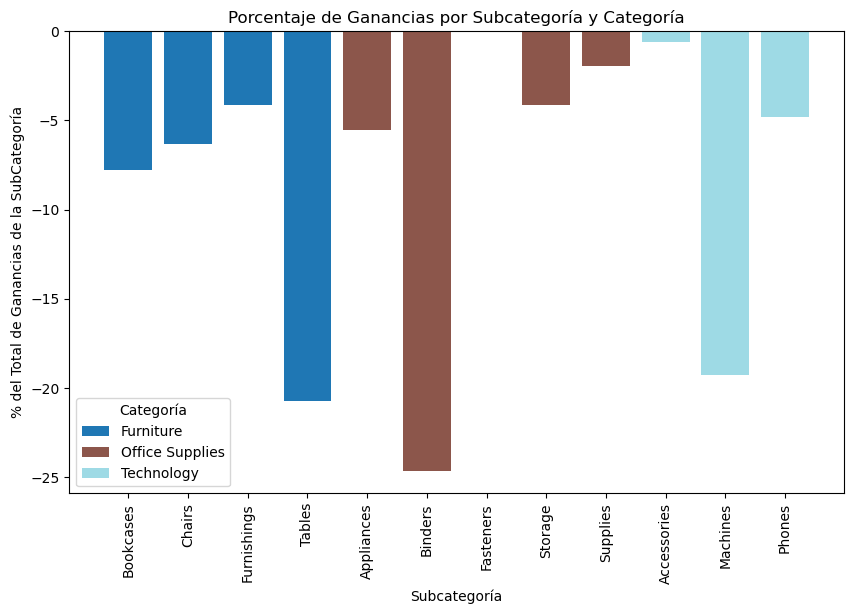

In [71]:

df_Gn_Categorias.reset_index(inplace=True)

categorias_unicas = df_Gn_Categorias['Categoria'].unique()
colores = plt.cm.get_cmap('tab20', len(categorias_unicas))  

plt.figure(figsize=(10, 6))
for i, categoria in enumerate(categorias_unicas):
    data = df_Gn_Categorias[df_Gn_Categorias['Categoria'] == categoria]
    ganancias = data['%_SubCategoria']
    color = colores(i)  
    plt.bar(data['SubCategoria'], ganancias, color=color, label=categoria)

plt.xlabel('Subcategoría')
plt.ylabel('% del Total de Ganancias de la SubCategoría')
plt.title('Porcentaje de Ganancias por Subcategoría y Categoría')
plt.xticks(rotation=90)
plt.legend(title='Categoría')
plt.show()


In [72]:
df_GananciaNegativa.groupby(by='Segmento_C').sum()

C:\Users\elias\AppData\Local\Temp\ipykernel_22412\2531125447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_GananciaNegativa.groupby(by='Segmento_C').sum()


,ID,Codigo_Postal,Ventas,Cantidad_Vendida,Descuento,Ganancia
Segmento_C,,,,,,
Consumer,5101571,57202260,247196.2460,3651,476.76,-84945.7112
Corporate,2927896,30034273,131860.5383,2191,272.00,-44787.2076
Home Office,1557473,17522858,89650.3705,1198,150.98,-26398.3669


In [73]:
df_GananciaNegativa.groupby(by='SubCategoria').sum()


C:\Users\elias\AppData\Local\Temp\ipykernel_22412\1842236590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_GananciaNegativa.groupby(by='SubCategoria').sum()


,ID,Codigo_Postal,Ventas,Cantidad_Vendida,Descuento,Ganancia
SubCategoria,,,,,,
Accessories,499173,5286382,10958.8000,330,18.20,-930.6265
Appliances,355294,4825871,3382.5340,235,53.60,-8629.6412
Binders,3081543,32609300,36140.6130,2456,452.40,-38510.4964
Bookcases,577022,6423506,48072.7408,422,37.99,-12152.2060
Chairs,1235400,15008025,91988.4560,876,61.40,-9880.8413
Fasteners,61455,701930,149.2800,55,2.40,-33.1952
Furnishings,906096,10970913,12845.8440,597,88.60,-6490.9134
Machines,209526,2236261,72456.2530,157,25.60,-30118.6682
Phones,695295,6105294,35797.8400,476,46.60,-7530.6235


In [74]:

df_GananciaNegativa['SubCategoria'].value_counts()

Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: SubCategoria, dtype: int64

# Análisis de Ganancias y Pérdidas

## Ganancias y Pérdidas

- **Ganancia Total:** $286,397.02
- **Pérdida Total:** $156,131.29

Nuestra ganancia total es positiva, lo que es alentador. Sin embargo, es importante destacar que hemos tenido pérdidas por un total de $156,131.29, lo que significa que no hemos sido completamente rentables.

## Categorías y Subcategorías

Al analizar nuestras categorías y subcategorías de productos, encontramos algunas tendencias interesantes:

- En la categoría "Office Supplies," productos como "Appliances," "Binders," "Paper," y "Storage" son muy rentables.
- En la categoría "Furniture," "Chairs" muestra un rendimiento destacado.
- Por otro lado, "Tables" y "Bookcases" en la categoría "Furniture," así como "Supplies" y "Machines," están generando pérdidas.

## Segmentos de Clientes

Para comprender mejor a quién le estamos vendiendo y cómo afecta nuestras ganancias, analizamos los segmentos de clientes:

- El segmento "Consumer" es el que genera mayores pérdidas.
- Le sigue en pérdidas el segmento "Corporate."
- El segmento "Home Office" también contribuye a las pérdidas, aunque en menor medida.

## Productos Menos Rentables

Hemos identificado ciertos productos que no están contribuyendo de manera positiva a nuestras ganancias. Los productos menos rentables incluyen "Tables," "Bookcases," "Supplies," y "Machines."

Este análisis nos proporciona información valiosa sobre las áreas en las que podemos mejorar para aumentar nuestra rentabilidad y reducir las pérdidas.

In [75]:

df_Mapa = pd.pivot_table(df_DataSet, values='Ganancia', 
                         index=['Pais_C', 'Estado_C', 'Ciudad_C'],
                         aggfunc='sum').reset_index()

df_Mapa

,Pais_C,Estado_C,Ciudad_C,Ganancia
0,United States,Alabama,Auburn,452.6071
1,United States,Alabama,Decatur,1000.0881
2,United States,Alabama,Florence,248.6589
3,United States,Alabama,Hoover,18.7173
4,United States,Alabama,Huntsville,1005.2572
...,...,...,...,...
599,United States,Wisconsin,Superior,514.0822
600,United States,Wisconsin,Waukesha,14.1700
601,United States,Wisconsin,Wausau,90.4306
602,United States,Wisconsin,West Allis,28.3708
